<a href="https://colab.research.google.com/github/nik-hil-24/DS403-Introduction-To-Statistical-Learning/blob/main/Assignment-3/init0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set Style
sns.set(style='darkgrid')

# **Task 1.1**

**I. Model**

In [5]:
# Linear Regression Model With In-Built L2-penalty using Matrix Form
class LinearRegression:
    def __init__(self, X_train, target, lambdaRidge=0):
        """
        LinearRegression: Linear Regression Model
        X_train (DataFrame): Independent Variables
        target (DataFrame): Dependent Variable
        lambdaRidge (float): L2-penalty Coefficient
        """

        self.target = target
        self.lambdaRidge = lambdaRidge
        self.rows, _ = X_train.shape

        # X is [feature-1,feature-2,...] we want [1,feature-1,feature-2,...] to perform matrix dot-product
        ones = np.ones((self.rows,1))
        self.mat_X = np.concatenate((ones, X_train), axis = 1)

        # Weights Variable
        self.cols = self.mat_X.shape[1]
        self.theta = np.zeros((self.cols,1))

    def fit(self):
        I = np.identity(self.cols)
        self.theta = np.dot(np.linalg.inv(np.dot(self.mat_X.T,self.mat_X)+self.lambdaRidge*I),
                            np.dot(self.mat_X.T,self.target))

    def calcCost(self, input, output):
        rows, _ = input.shape
        ones = np.ones((rows,1))
        mat_X = np.concatenate((ones, input), axis = 1)
        tempval = np.dot(mat_X, self.theta) - output
        return np.sum(np.power(tempval, 2))/(2*rows) + self.lambdaRidge*np.sum(np.power(self.theta,2))

**II. Plots**

In [6]:
# Read Dataset
df = pd.read_csv('/content/drive/MyDrive/ISL Assgn-3/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
# Split Dataset
X = df.drop(['Sales'], axis = 'columns')
y = df[['Sales']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
def plotTSNE(X,y):
    # TSNE in 2-D
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(X)
    X_tsne_data = np.vstack((X_tsne.T, df['Sales'])).T
    df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1','Dim2','Target'])

    # Plot
    sns.scatterplot(data=df_tsne, hue='Target', x='Dim1', y='Dim2')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show();

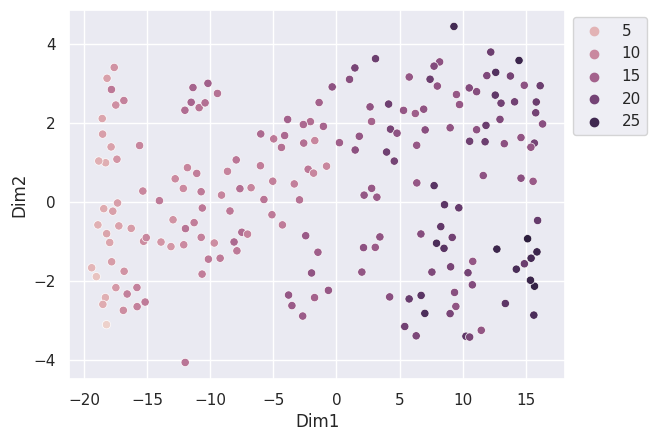

In [9]:
plotTSNE(X,y)

**III. Linear Regression with and without L2-penalty**

In [10]:
# Vanilla Linear Reg
simpleLinearReg = LinearRegression(X_train,y_train)
simpleLinearReg.fit()

# Ridge Reg
ridgeReg = LinearRegression(X_train,y_train,lambdaRidge=0.01)
ridgeReg.fit()

In [11]:
# Losses
linearRegTrainLoss = simpleLinearReg.calcCost(X_train,y_train)[0]
linearRegTestLoss = simpleLinearReg.calcCost(X_test,y_test)[0]

ridgeRegTrainLoss = ridgeReg.calcCost(X_train,y_train)[0]
ridgeRegTestLoss = ridgeReg.calcCost(X_test,y_test)[0]

print(f"For Simple Linear Regression Model, the train loss and test loss are {round(linearRegTrainLoss,3)} and {round(linearRegTestLoss,3)} respectively.")
print(f"For Ridge Regression Model, the train loss and test loss are {round(ridgeRegTrainLoss,3)} and {round(ridgeRegTestLoss,3)} respectively.")

For Simple Linear Regression Model, the train loss and test loss are 1.381 and 1.295 respectively.
For Ridge Regression Model, the train loss and test loss are 1.626 and 1.539 respectively.


**IV. Experiment with lambda val**

In [12]:
# Values Of Lambda For Ridge Regression
lambdaLog = np.linspace(-3,3.1,110)
lambdaVals = np.exp(lambdaLog)

trainLoss = []
testLoss = []

for val in lambdaVals:
    # Train Model
    model = LinearRegression(X_train,y_train,lambdaRidge=val)
    model.fit()
    # Calc Loss
    l1 = model.calcCost(X_train,y_train)[0]
    l2 = model.calcCost(X_test,y_test)[0]
    # Append To List
    trainLoss.append(l1)
    testLoss.append(l2)

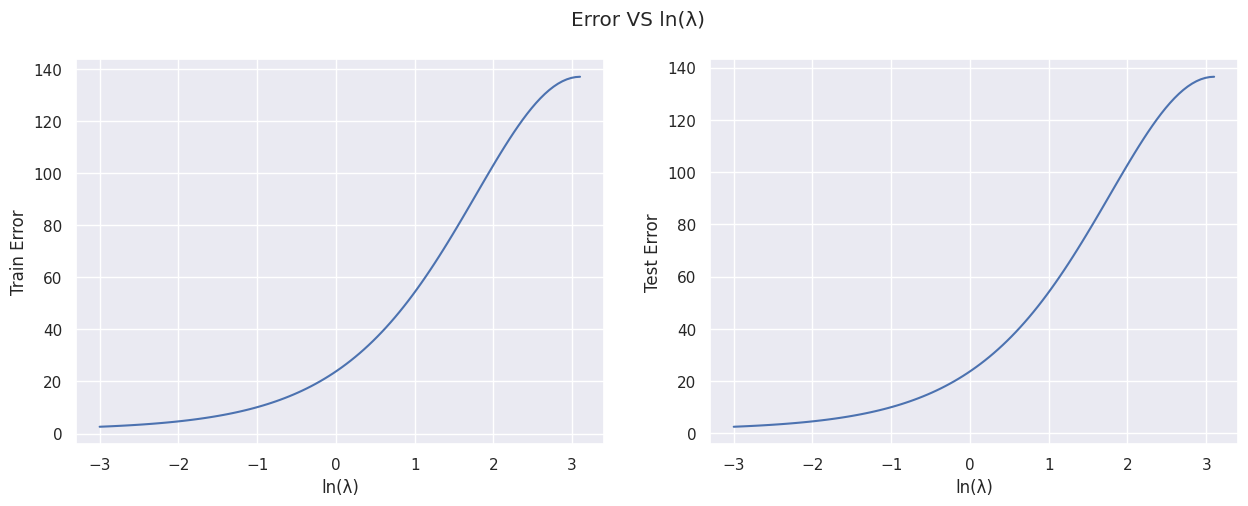

In [13]:
# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Error VS ln(λ)')

ax[0].plot(lambdaLog, trainLoss)
ax[0].set_xlabel("ln(λ)")
ax[0].set_ylabel("Train Error")

ax[1].plot(lambdaLog, testLoss)
ax[1].set_xlabel("ln(λ)")
ax[1].set_ylabel("Test Error");

# **Task 1.2**

**I. Scale Data**

In [14]:
# Scale Data
dfNorm = pd.DataFrame(normalize(df))
dfStd = pd.DataFrame(StandardScaler().fit_transform(df))

dfNorm.columns = df.columns
dfStd.columns = df.columns

In [15]:
# Split Datasets
XNorm = dfNorm.drop(['Sales'], axis = 'columns')
yNorm = dfNorm[['Sales']]

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(XNorm, yNorm, test_size = 0.2)

XStd = dfStd.drop(['Sales'], axis = 'columns')
yStd = dfStd[['Sales']]
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(XStd, yStd, test_size = 0.2)

**II. t-sne Plot**

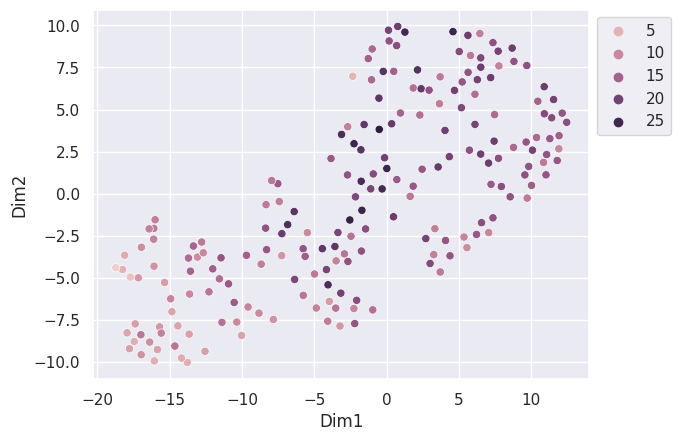

In [16]:
# For Normalized Data
plotTSNE(XNorm,yNorm)

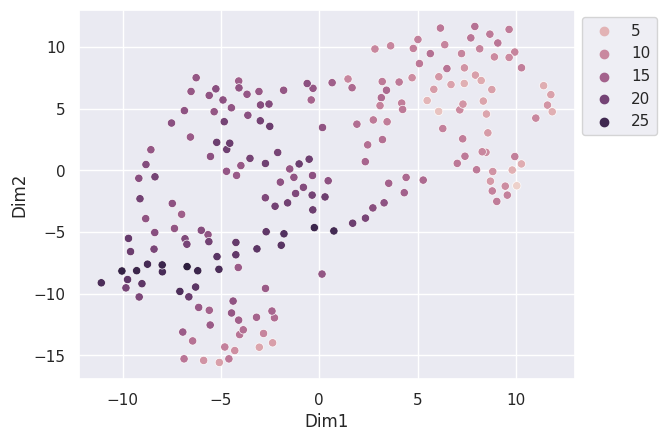

In [17]:
# For Standardized Data
plotTSNE(XStd,yStd)

**III. Compare Errors**

In [18]:
# Vanilla Linear Reg
simpleLinearReg = LinearRegression(X_train_norm,y_train_norm)
simpleLinearReg.fit()

# Ridge Reg
ridgeReg = LinearRegression(X_train_norm,y_train_norm,lambdaRidge=0.01)
ridgeReg.fit()

# Losses
linearRegTrainLoss = simpleLinearReg.calcCost(X_train_norm,y_train_norm)[0]
linearRegTestLoss = simpleLinearReg.calcCost(X_test_norm,y_test_norm)[0]

ridgeRegTrainLoss = ridgeReg.calcCost(X_train_norm,y_train_norm)[0]
ridgeRegTestLoss = ridgeReg.calcCost(X_test_norm,y_test_norm)[0]

print(f"For Simple Linear Regression Model with Normalized Data, the train loss and test loss are {round(linearRegTrainLoss,5)} and {round(linearRegTestLoss,5)} respectively.")
print(f"For Ridge Regression Model with Normalized Data, the train loss and test loss are {round(ridgeRegTrainLoss,5)} and {round(ridgeRegTestLoss,5)} respectively.")

For Simple Linear Regression Model with Normalized Data, the train loss and test loss are 0.00086 and 0.00029 respectively.
For Ridge Regression Model with Normalized Data, the train loss and test loss are 0.00119 and 0.00062 respectively.


In [19]:
# Vanilla Linear Reg
simpleLinearReg = LinearRegression(X_train_std,y_train_std)
simpleLinearReg.fit()

# Ridge Reg
ridgeReg = LinearRegression(X_train_std,y_train_std,lambdaRidge=0.01)
ridgeReg.fit()

# Losses
linearRegTrainLoss = simpleLinearReg.calcCost(X_train_std,y_train_std)[0]
linearRegTestLoss = simpleLinearReg.calcCost(X_test_std,y_test_std)[0]

ridgeRegTrainLoss = ridgeReg.calcCost(X_train_std,y_train_std)[0]
ridgeRegTestLoss = ridgeReg.calcCost(X_test_std,y_test_std)[0]

print(f"For Simple Linear Regression Model with Standardized Data, the train loss and test loss are {round(linearRegTrainLoss,5)} and {round(linearRegTestLoss,5)} respectively.")
print(f"For Ridge Regression Model with Standardized Data, the train loss and test loss are {round(ridgeRegTrainLoss,5)} and {round(ridgeRegTestLoss,5)} respectively.")

For Simple Linear Regression Model with Standardized Data, the train loss and test loss are 0.04912 and 0.0497 respectively.
For Ridge Regression Model with Standardized Data, the train loss and test loss are 0.05841 and 0.05898 respectively.


# **Task 2**

**I. Train Model**

In [20]:
# Dataset
df=pd.read_csv('/content/drive/MyDrive/ISL Assgn-3/banknote_authentication.csv')

# Split Target and Independent Variables
X=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

In [21]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
class LogisticRegression():
	def __init__(self,lr,iters):
		self.lr = lr
		self.iters = iters

	def fit(self,X,Y):
		self.rows, self.cols = X.shape
		# Weights
		self.W = np.zeros(self.cols)
		self.b = 0
		self.X = X
		self.y = Y
        # Gradient Descent
		for i in range(self.iters) :
			self.update_weights()
		return self

	def update_weights(self):
        # Predict Vals
		pred=1/(1+np.exp(-(self.X.dot(self.W)+self.b)))
		# Calculate Gradient
		diff = (pred-self.y.T)
		diff = np.reshape(diff,self.rows)
		dW = np.dot(self.X.T,diff)/self.rows
		db = np.sum(diff)/self.rows
		# Weight Update
		self.W=self.W-self.lr*dW
		self.b=self.b-self.lr*db
		return self

	def predict(self,X):
		Z = 1/(1+np.exp(-(X.dot(self.W)+self.b)))
		Y = np.where(Z>0.5,1,0)
		return Y

In [23]:
# Model training
model = LogisticRegression(lr=0.1,iters=1000)
model.fit(X_train,y_train)

**II. Accuracy Verification**

In [24]:
# Accuracy
y_pred = model.predict(X_test)
correct = 0

for count in range(np.size(y_pred)) :
    if y_test[count]==y_pred[count]:
        correct=correct+1
    count=count+1

print( "Accuracy on test set by our model: ", (correct/count)*100)

Accuracy on test set by our model:  99.27272727272727


# **Task 3**

**I. Load the data and plot the stock value VS time**

In [25]:
data = pd.read_excel("/content/drive/MyDrive/ISL Assgn-3/Apple_stock_data.xlsx")
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,09/29/2023,$171.21,51861080,$172.02,$173.07,$170.341
1,09/28/2023,$170.69,56294420,$169.34,$172.03,$167.62
2,09/27/2023,$170.43,66921810,$172.62,$173.04,$169.05
3,09/26/2023,$171.96,64588950,$174.82,$175.20,$171.66
4,09/25/2023,$176.08,46172740,$174.20,$176.97,$174.15


In [26]:
# Converting columns to proper format
data["Date"]=pd.to_datetime(data["Date"])
data=data.sort_values(by="Date")
data["Close/Last"]=data["Close/Last"].str.replace("$", "").astype(float)
data["Volume"]=data["Volume"].astype(float)
data["Open"]=data["Open"].str.replace("$", "").astype(float)
data["High"]=data["High"].str.replace("$", "").astype(float)
data["Low"]=data["Low"].str.replace("$", "").astype(float)

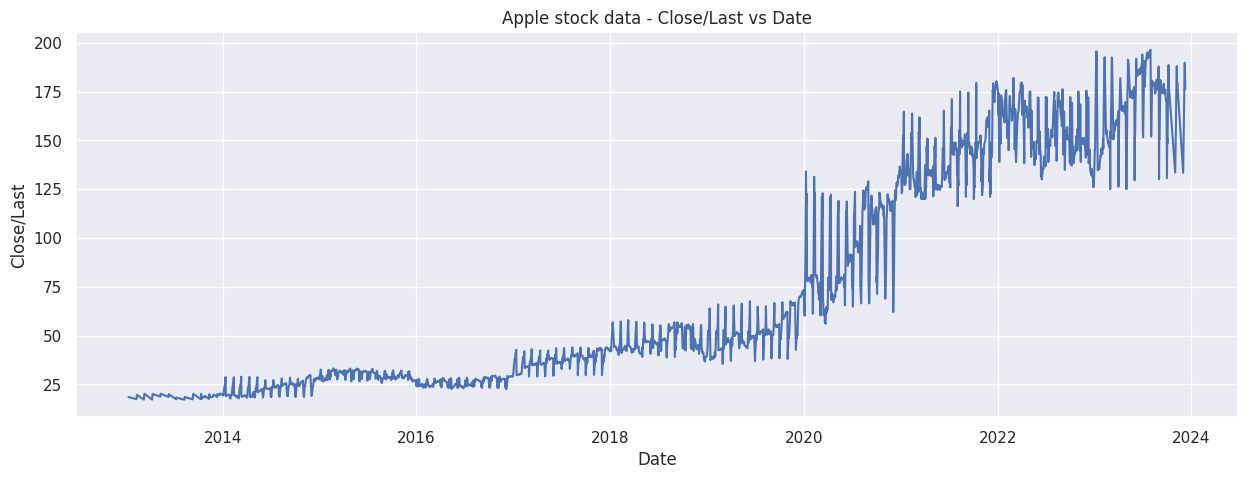

In [27]:
# Plot: Close/Last vs Date
plt.figure(figsize=(15, 5))
sns.set_style("darkgrid")
sns.lineplot(x="Date", y="Close/Last", data=data)
plt.title("Apple stock data - Close/Last vs Date")
plt.xlabel("Date")
plt.ylabel("Close/Last")
plt.show();

In [28]:
# Dataset Split
Xtr = data[data["Date"] < "2022-01-01"]
Xte = data[data["Date"] >= "2022-01-01"]

In [29]:
# Model
class TemporalPolynomialRegressor:
    def __init__(self, name, n_ivars=None, degree=2, window_size=10):
        self.name = name
        self.n_ivars = n_ivars
        self.degree = degree
        self.window_size = window_size
        self.weights = None
        if n_ivars is not None:
            self._build()
        self.X_preprocessor = StandardScaler()
        self.Y_preprocessor = StandardScaler()

    def _build(self):
        self.weights = np.zeros(self.window_size * self.n_ivars * (self.degree + 1))

    def gen_tpr_data(self, X, Y=None, time_steps=None, update_preprocessor=False):
        if time_steps is None:
            time_steps = np.arange(self.window_size, X.shape[0])
        X_tprd = []
        Y_tprd = []
        for time_step in time_steps:
            if time_step < self.window_size or time_step >= X.shape[0]:
                continue
            X_time_slice = X[time_step - self.window_size : time_step]
            X_time_slice = np.array(
                [X_time_slice**i for i in range(self.degree + 1)]
            ).flatten()
            X_tprd.append(X_time_slice)
            if Y is not None:
                target = Y[time_step]
                Y_tprd.append(target)
        X_tprd = np.array(X_tprd)
        Y_tprd = np.array(Y_tprd)
        if update_preprocessor:
            self.X_preprocessor.partial_fit(X_tprd)
            self.Y_preprocessor.partial_fit(Y_tprd.reshape(-1, 1))
        X_tprd = self.X_preprocessor.transform(X_tprd)
        Y_tprd = self.Y_preprocessor.transform(Y_tprd.reshape(-1, 1)).reshape(-1)
        return X_tprd, Y_tprd

    def train(
        self,
        X,
        Y,
        time_steps=None,
        method="gradient_descent",
        learning_rate=1e-3,
        batch_size=32,
        epochs=1000,
        priming_epochs=3,
        L1=1e-3,
        L2=1e-3,
    ):
        if self.weights is None:
            self.n_ivars = X.shape[1]
            self._build()
        if time_steps is None:
            time_steps = np.arange(self.window_size, X.shape[0])
            np.random.shuffle(time_steps)

        epoch_loss_history = []

        if method == "gradient_descent":
            for epoch in range(epochs):
                if epoch < priming_epochs:
                    update_preprocessor = True
                else:
                    update_preprocessor = False
                np.random.shuffle(time_steps)
                batch_losses = []
                progress_bar = tqdm(
                    range(0, len(time_steps), batch_size),
                    position=0,
                    leave=True,
                    dynamic_ncols=True,
                )
                for i in progress_bar:
                    batch_time_steps = time_steps[i : i + batch_size]
                    X_tprd, Y_tprd = self.gen_tpr_data(
                        X, Y, batch_time_steps, update_preprocessor
                    )
                    Y_pred = X_tprd @ self.weights
                    # Adding L1 and L2 regularization
                    loss = np.mean((Y_pred - Y_tprd) ** 2)
                    batch_losses.append(loss)
                    l1_reg = L1 * np.sign(self.weights)
                    l2_reg = L2 * self.weights
                    grad = X_tprd.T @ (Y_pred - Y_tprd) + l1_reg + l2_reg
                    self.weights -= learning_rate * grad / batch_size

                    avg_loss = np.mean(batch_losses)
                    progress_bar.set_description(
                        f"Epoch {epoch+1}/{epochs}, Training Loss: {avg_loss:.6f}"
                    )

                mean_epoch_loss = np.mean(batch_losses)
                epoch_loss_history.append(mean_epoch_loss)

        elif method == "least_squares":
            X_tprd, Y_tprd = self.gen_tpr_data(X, Y, time_steps, True)
            X_tprd = self.X_preprocessor.transform(X_tprd)
            Y_tprd = self.Y_preprocessor.transform(Y_tprd.reshape(-1, 1)).reshape(-1)
            self.weights = np.linalg.pinv(X_tprd.T @ X_tprd) @ (X_tprd.T @ Y_tprd)

        else:
            raise ValueError("Invalid method")

        return epoch_loss_history

    def predict(self, X_tprd, Y_tprd=None):
        Y_pred = X_tprd @ self.weights
        accuracy = None
        if Y_tprd is not None:
            accuracy = np.mean((Y_pred - Y_tprd) ** 2)
        Y_pred = self.Y_preprocessor.inverse_transform(Y_pred.reshape(-1, 1)).reshape(
            -1
        )
        return Y_pred, accuracy

In [30]:
# i.e predicting the Close/Last value for the next day.
# Data
X = np.array(Xtr["Close/Last"])
Xn = X.reshape(-1, 1)
Yn = X
Xtr = Xn[: int(0.8 * Xn.shape[0])]
Ytr = Yn[: int(0.8 * Yn.shape[0])]
Xte = Xn[int(0.8 * Xn.shape[0]) :]
Yte = Yn[int(0.8 * Yn.shape[0]) :]

# Create models for degrees 1 to 4 and window sizes 1 to 20
models = []
for degree in range(1, 6):
    for window_size in range(1, 21):
        model = TemporalPolynomialRegressor(
            name=f"Model_D{degree}W{window_size}",
            n_ivars=1,
            degree=degree,
            window_size=window_size,
        )
        models.append(model)

# Training models
for model in models:
    print(f"Model d = {model.degree} and w = {model.window_size}")
    model.train(Xtr, Ytr, method="gradient_descent", epochs=1, batch_size=32)
    print("Training complete\n")

Model d = 1 and w = 1


Epoch 1/1, Training Loss: 0.870005: 100%|██████████| 52/52 [00:00<00:00, 127.99it/s]


Training complete

Model d = 1 and w = 2


Epoch 1/1, Training Loss: 0.853303: 100%|██████████| 52/52 [00:00<00:00, 111.19it/s]


Training complete

Model d = 1 and w = 3


Epoch 1/1, Training Loss: 0.973475: 100%|██████████| 52/52 [00:00<00:00, 103.08it/s]


Training complete

Model d = 1 and w = 4


Epoch 1/1, Training Loss: 0.815455: 100%|██████████| 52/52 [00:00<00:00, 94.06it/s]


Training complete

Model d = 1 and w = 5


Epoch 1/1, Training Loss: 0.751185: 100%|██████████| 52/52 [00:00<00:00, 107.12it/s]


Training complete

Model d = 1 and w = 6


Epoch 1/1, Training Loss: 0.821762: 100%|██████████| 52/52 [00:00<00:00, 112.20it/s]


Training complete

Model d = 1 and w = 7


Epoch 1/1, Training Loss: 0.784249: 100%|██████████| 52/52 [00:00<00:00, 79.69it/s]


Training complete

Model d = 1 and w = 8


Epoch 1/1, Training Loss: 0.838983: 100%|██████████| 52/52 [00:00<00:00, 86.74it/s]


Training complete

Model d = 1 and w = 9


Epoch 1/1, Training Loss: 0.721976: 100%|██████████| 52/52 [00:00<00:00, 86.77it/s]


Training complete

Model d = 1 and w = 10


Epoch 1/1, Training Loss: 0.709114: 100%|██████████| 52/52 [00:00<00:00, 90.76it/s]


Training complete

Model d = 1 and w = 11


Epoch 1/1, Training Loss: 0.741392: 100%|██████████| 52/52 [00:00<00:00, 92.80it/s]


Training complete

Model d = 1 and w = 12


Epoch 1/1, Training Loss: 0.661010: 100%|██████████| 52/52 [00:00<00:00, 96.31it/s]


Training complete

Model d = 1 and w = 13


Epoch 1/1, Training Loss: 0.701155: 100%|██████████| 52/52 [00:00<00:00, 95.67it/s]


Training complete

Model d = 1 and w = 14


Epoch 1/1, Training Loss: 0.585407: 100%|██████████| 52/52 [00:00<00:00, 80.15it/s]


Training complete

Model d = 1 and w = 15


Epoch 1/1, Training Loss: 0.664586: 100%|██████████| 52/52 [00:00<00:00, 116.37it/s]


Training complete

Model d = 1 and w = 16


Epoch 1/1, Training Loss: 0.651357: 100%|██████████| 52/52 [00:00<00:00, 179.32it/s]


Training complete

Model d = 1 and w = 17


Epoch 1/1, Training Loss: 0.626442: 100%|██████████| 52/52 [00:00<00:00, 191.79it/s]


Training complete

Model d = 1 and w = 18


Epoch 1/1, Training Loss: 0.594080: 100%|██████████| 52/52 [00:00<00:00, 191.58it/s]


Training complete

Model d = 1 and w = 19


Epoch 1/1, Training Loss: 0.593417: 100%|██████████| 52/52 [00:00<00:00, 181.21it/s]


Training complete

Model d = 1 and w = 20


Epoch 1/1, Training Loss: 0.548742: 100%|██████████| 52/52 [00:00<00:00, 180.94it/s]


Training complete

Model d = 2 and w = 1


Epoch 1/1, Training Loss: 0.857366: 100%|██████████| 52/52 [00:00<00:00, 176.51it/s]


Training complete

Model d = 2 and w = 2


Epoch 1/1, Training Loss: 0.769883: 100%|██████████| 52/52 [00:00<00:00, 187.81it/s]


Training complete

Model d = 2 and w = 3


Epoch 1/1, Training Loss: 0.785190: 100%|██████████| 52/52 [00:00<00:00, 194.25it/s]


Training complete

Model d = 2 and w = 4


Epoch 1/1, Training Loss: 0.749045: 100%|██████████| 52/52 [00:00<00:00, 197.90it/s]


Training complete

Model d = 2 and w = 5


Epoch 1/1, Training Loss: 0.632982: 100%|██████████| 52/52 [00:00<00:00, 217.68it/s]


Training complete

Model d = 2 and w = 6


Epoch 1/1, Training Loss: 0.657714: 100%|██████████| 52/52 [00:00<00:00, 216.29it/s]


Training complete

Model d = 2 and w = 7


Epoch 1/1, Training Loss: 0.658972: 100%|██████████| 52/52 [00:00<00:00, 171.54it/s]


Training complete

Model d = 2 and w = 8


Epoch 1/1, Training Loss: 0.632090: 100%|██████████| 52/52 [00:00<00:00, 160.19it/s]


Training complete

Model d = 2 and w = 9


Epoch 1/1, Training Loss: 0.514224: 100%|██████████| 52/52 [00:00<00:00, 175.61it/s]


Training complete

Model d = 2 and w = 10


Epoch 1/1, Training Loss: 0.541824: 100%|██████████| 52/52 [00:00<00:00, 196.80it/s]


Training complete

Model d = 2 and w = 11


Epoch 1/1, Training Loss: 0.561574: 100%|██████████| 52/52 [00:00<00:00, 175.73it/s]


Training complete

Model d = 2 and w = 12


Epoch 1/1, Training Loss: 0.497322: 100%|██████████| 52/52 [00:00<00:00, 190.09it/s]


Training complete

Model d = 2 and w = 13


Epoch 1/1, Training Loss: 0.479530: 100%|██████████| 52/52 [00:00<00:00, 205.10it/s]


Training complete

Model d = 2 and w = 14


Epoch 1/1, Training Loss: 0.473391: 100%|██████████| 52/52 [00:00<00:00, 188.69it/s]


Training complete

Model d = 2 and w = 15


Epoch 1/1, Training Loss: 0.501261: 100%|██████████| 52/52 [00:00<00:00, 196.95it/s]


Training complete

Model d = 2 and w = 16


Epoch 1/1, Training Loss: 0.456594: 100%|██████████| 52/52 [00:00<00:00, 201.43it/s]


Training complete

Model d = 2 and w = 17


Epoch 1/1, Training Loss: 0.447800: 100%|██████████| 52/52 [00:00<00:00, 203.05it/s]


Training complete

Model d = 2 and w = 18


Epoch 1/1, Training Loss: 0.413781: 100%|██████████| 52/52 [00:00<00:00, 204.65it/s]


Training complete

Model d = 2 and w = 19


Epoch 1/1, Training Loss: 0.426227: 100%|██████████| 52/52 [00:00<00:00, 190.48it/s]


Training complete

Model d = 2 and w = 20


Epoch 1/1, Training Loss: 0.388999: 100%|██████████| 52/52 [00:00<00:00, 195.28it/s]


Training complete

Model d = 3 and w = 1


Epoch 1/1, Training Loss: 0.969594: 100%|██████████| 52/52 [00:00<00:00, 194.69it/s]


Training complete

Model d = 3 and w = 2


Epoch 1/1, Training Loss: 0.816494: 100%|██████████| 52/52 [00:00<00:00, 193.32it/s]


Training complete

Model d = 3 and w = 3


Epoch 1/1, Training Loss: 0.759894: 100%|██████████| 52/52 [00:00<00:00, 187.70it/s]


Training complete

Model d = 3 and w = 4


Epoch 1/1, Training Loss: 0.705264: 100%|██████████| 52/52 [00:00<00:00, 195.25it/s]


Training complete

Model d = 3 and w = 5


Epoch 1/1, Training Loss: 0.681205: 100%|██████████| 52/52 [00:00<00:00, 189.49it/s]


Training complete

Model d = 3 and w = 6


Epoch 1/1, Training Loss: 0.620814: 100%|██████████| 52/52 [00:00<00:00, 204.63it/s]


Training complete

Model d = 3 and w = 7


Epoch 1/1, Training Loss: 0.516624: 100%|██████████| 52/52 [00:00<00:00, 181.78it/s]


Training complete

Model d = 3 and w = 8


Epoch 1/1, Training Loss: 0.563739: 100%|██████████| 52/52 [00:00<00:00, 175.80it/s]


Training complete

Model d = 3 and w = 9


Epoch 1/1, Training Loss: 0.528546: 100%|██████████| 52/52 [00:00<00:00, 191.08it/s]


Training complete

Model d = 3 and w = 10


Epoch 1/1, Training Loss: 0.468902: 100%|██████████| 52/52 [00:00<00:00, 176.35it/s]


Training complete

Model d = 3 and w = 11


Epoch 1/1, Training Loss: 0.481843: 100%|██████████| 52/52 [00:00<00:00, 195.13it/s]


Training complete

Model d = 3 and w = 12


Epoch 1/1, Training Loss: 0.461133: 100%|██████████| 52/52 [00:00<00:00, 200.33it/s]


Training complete

Model d = 3 and w = 13


Epoch 1/1, Training Loss: 0.441738: 100%|██████████| 52/52 [00:00<00:00, 206.85it/s]


Training complete

Model d = 3 and w = 14


Epoch 1/1, Training Loss: 0.485912: 100%|██████████| 52/52 [00:00<00:00, 202.68it/s]


Training complete

Model d = 3 and w = 15


Epoch 1/1, Training Loss: 0.452602: 100%|██████████| 52/52 [00:00<00:00, 203.69it/s]


Training complete

Model d = 3 and w = 16


Epoch 1/1, Training Loss: 0.412829: 100%|██████████| 52/52 [00:00<00:00, 199.64it/s]


Training complete

Model d = 3 and w = 17


Epoch 1/1, Training Loss: 0.414736: 100%|██████████| 52/52 [00:00<00:00, 198.44it/s]


Training complete

Model d = 3 and w = 18


Epoch 1/1, Training Loss: 0.402177: 100%|██████████| 52/52 [00:00<00:00, 180.82it/s]


Training complete

Model d = 3 and w = 19


Epoch 1/1, Training Loss: 0.365110: 100%|██████████| 52/52 [00:00<00:00, 179.66it/s]


Training complete

Model d = 3 and w = 20


Epoch 1/1, Training Loss: 0.339355: 100%|██████████| 52/52 [00:00<00:00, 188.49it/s]


Training complete

Model d = 4 and w = 1


Epoch 1/1, Training Loss: 0.895758: 100%|██████████| 52/52 [00:00<00:00, 201.41it/s]


Training complete

Model d = 4 and w = 2


Epoch 1/1, Training Loss: 0.754234: 100%|██████████| 52/52 [00:00<00:00, 178.12it/s]


Training complete

Model d = 4 and w = 3


Epoch 1/1, Training Loss: 0.696299: 100%|██████████| 52/52 [00:00<00:00, 211.16it/s]


Training complete

Model d = 4 and w = 4


Epoch 1/1, Training Loss: 0.687492: 100%|██████████| 52/52 [00:00<00:00, 207.40it/s]


Training complete

Model d = 4 and w = 5


Epoch 1/1, Training Loss: 0.630474: 100%|██████████| 52/52 [00:00<00:00, 206.28it/s]


Training complete

Model d = 4 and w = 6


Epoch 1/1, Training Loss: 0.621132: 100%|██████████| 52/52 [00:00<00:00, 182.55it/s]


Training complete

Model d = 4 and w = 7


Epoch 1/1, Training Loss: 0.610700: 100%|██████████| 52/52 [00:00<00:00, 203.46it/s]


Training complete

Model d = 4 and w = 8


Epoch 1/1, Training Loss: 0.491620: 100%|██████████| 52/52 [00:00<00:00, 197.31it/s]


Training complete

Model d = 4 and w = 9


Epoch 1/1, Training Loss: 0.575295: 100%|██████████| 52/52 [00:00<00:00, 206.07it/s]


Training complete

Model d = 4 and w = 10


Epoch 1/1, Training Loss: 0.536347: 100%|██████████| 52/52 [00:00<00:00, 176.48it/s]


Training complete

Model d = 4 and w = 11


Epoch 1/1, Training Loss: 0.471539: 100%|██████████| 52/52 [00:00<00:00, 168.78it/s]


Training complete

Model d = 4 and w = 12


Epoch 1/1, Training Loss: 0.443481: 100%|██████████| 52/52 [00:00<00:00, 172.87it/s]


Training complete

Model d = 4 and w = 13


Epoch 1/1, Training Loss: 0.419940: 100%|██████████| 52/52 [00:00<00:00, 151.13it/s]


Training complete

Model d = 4 and w = 14


Epoch 1/1, Training Loss: 0.395865: 100%|██████████| 52/52 [00:00<00:00, 175.75it/s]


Training complete

Model d = 4 and w = 15


Epoch 1/1, Training Loss: 0.405555: 100%|██████████| 52/52 [00:00<00:00, 173.80it/s]


Training complete

Model d = 4 and w = 16


Epoch 1/1, Training Loss: 0.356675: 100%|██████████| 52/52 [00:00<00:00, 195.88it/s]


Training complete

Model d = 4 and w = 17


Epoch 1/1, Training Loss: 0.381374: 100%|██████████| 52/52 [00:00<00:00, 178.40it/s]


Training complete

Model d = 4 and w = 18


Epoch 1/1, Training Loss: 0.395939: 100%|██████████| 52/52 [00:00<00:00, 199.13it/s]


Training complete

Model d = 4 and w = 19


Epoch 1/1, Training Loss: 0.340214: 100%|██████████| 52/52 [00:00<00:00, 202.48it/s]


Training complete

Model d = 4 and w = 20


Epoch 1/1, Training Loss: 0.329568: 100%|██████████| 52/52 [00:00<00:00, 190.86it/s]


Training complete

Model d = 5 and w = 1


Epoch 1/1, Training Loss: 0.954278: 100%|██████████| 52/52 [00:00<00:00, 181.30it/s]


Training complete

Model d = 5 and w = 2


Epoch 1/1, Training Loss: 0.724306: 100%|██████████| 52/52 [00:00<00:00, 196.88it/s]


Training complete

Model d = 5 and w = 3


Epoch 1/1, Training Loss: 0.705256: 100%|██████████| 52/52 [00:00<00:00, 176.43it/s]


Training complete

Model d = 5 and w = 4


Epoch 1/1, Training Loss: 0.703230: 100%|██████████| 52/52 [00:00<00:00, 185.57it/s]


Training complete

Model d = 5 and w = 5


Epoch 1/1, Training Loss: 0.624905: 100%|██████████| 52/52 [00:00<00:00, 187.46it/s]


Training complete

Model d = 5 and w = 6


Epoch 1/1, Training Loss: 0.623525: 100%|██████████| 52/52 [00:00<00:00, 182.27it/s]


Training complete

Model d = 5 and w = 7


Epoch 1/1, Training Loss: 0.530444: 100%|██████████| 52/52 [00:00<00:00, 188.32it/s]


Training complete

Model d = 5 and w = 8


Epoch 1/1, Training Loss: 0.521890: 100%|██████████| 52/52 [00:00<00:00, 170.15it/s]


Training complete

Model d = 5 and w = 9


Epoch 1/1, Training Loss: 0.480989: 100%|██████████| 52/52 [00:00<00:00, 163.03it/s]


Training complete

Model d = 5 and w = 10


Epoch 1/1, Training Loss: 0.510584: 100%|██████████| 52/52 [00:00<00:00, 157.71it/s]


Training complete

Model d = 5 and w = 11


Epoch 1/1, Training Loss: 0.457956: 100%|██████████| 52/52 [00:00<00:00, 156.42it/s]


Training complete

Model d = 5 and w = 12


Epoch 1/1, Training Loss: 0.438773: 100%|██████████| 52/52 [00:00<00:00, 154.97it/s]


Training complete

Model d = 5 and w = 13


Epoch 1/1, Training Loss: 0.437179: 100%|██████████| 52/52 [00:00<00:00, 146.82it/s]


Training complete

Model d = 5 and w = 14


Epoch 1/1, Training Loss: 0.430448: 100%|██████████| 52/52 [00:00<00:00, 165.33it/s]


Training complete

Model d = 5 and w = 15


Epoch 1/1, Training Loss: 0.439595: 100%|██████████| 52/52 [00:00<00:00, 177.80it/s]


Training complete

Model d = 5 and w = 16


Epoch 1/1, Training Loss: 0.390761: 100%|██████████| 52/52 [00:00<00:00, 174.29it/s]


Training complete

Model d = 5 and w = 17


Epoch 1/1, Training Loss: 0.378674: 100%|██████████| 52/52 [00:00<00:00, 169.16it/s]


Training complete

Model d = 5 and w = 18


Epoch 1/1, Training Loss: 0.382746: 100%|██████████| 52/52 [00:00<00:00, 163.78it/s]


Training complete

Model d = 5 and w = 19


Epoch 1/1, Training Loss: 0.360547: 100%|██████████| 52/52 [00:00<00:00, 168.03it/s]


Training complete

Model d = 5 and w = 20


Epoch 1/1, Training Loss: 0.358234: 100%|██████████| 52/52 [00:00<00:00, 173.48it/s]

Training complete



Model d = 1 and w = 1
Test Loss: 29.789092
Model d = 1 and w = 2
Test Loss: 27.328075
Model d = 1 and w = 3
Test Loss: 23.831769
Model d = 1 and w = 4
Test Loss: 22.684014
Model d = 1 and w = 5
Test Loss: 21.232915
Model d = 1 and w = 6
Test Loss: 18.763967
Model d = 1 and w = 7
Test Loss: 17.336656
Model d = 1 and w = 8
Test Loss: 14.799496
Model d = 1 and w = 9
Test Loss: 14.457724
Model d = 1 and w = 10
Test Loss: 14.011677
Model d = 1 and w = 11
Test Loss: 12.093986
Model d = 1 and w = 12
Test Loss: 11.628118
Model d = 1 and w = 13
Test Loss: 9.660063
Model d = 1 and w = 14
Test Loss: 11.096841
Model d = 1 and w = 15
Test Loss: 8.610200
Model d = 1 and w = 16
Test Loss: 7.541534
Model d = 1 and w = 17
Test Loss: 7.216333
Model d = 1 and w = 18
Test Loss: 7.181126
Model d = 1 and w = 19
Test Loss: 5.756772
Model d = 1 and w = 20
Test Loss: 6.235393
Model d = 2 and w = 1
Test Loss: 25.951689
Model d = 2 and w = 2
Test Loss: 21.335961
Model d = 2 and w = 3
Test Loss: 15.714036
Model d

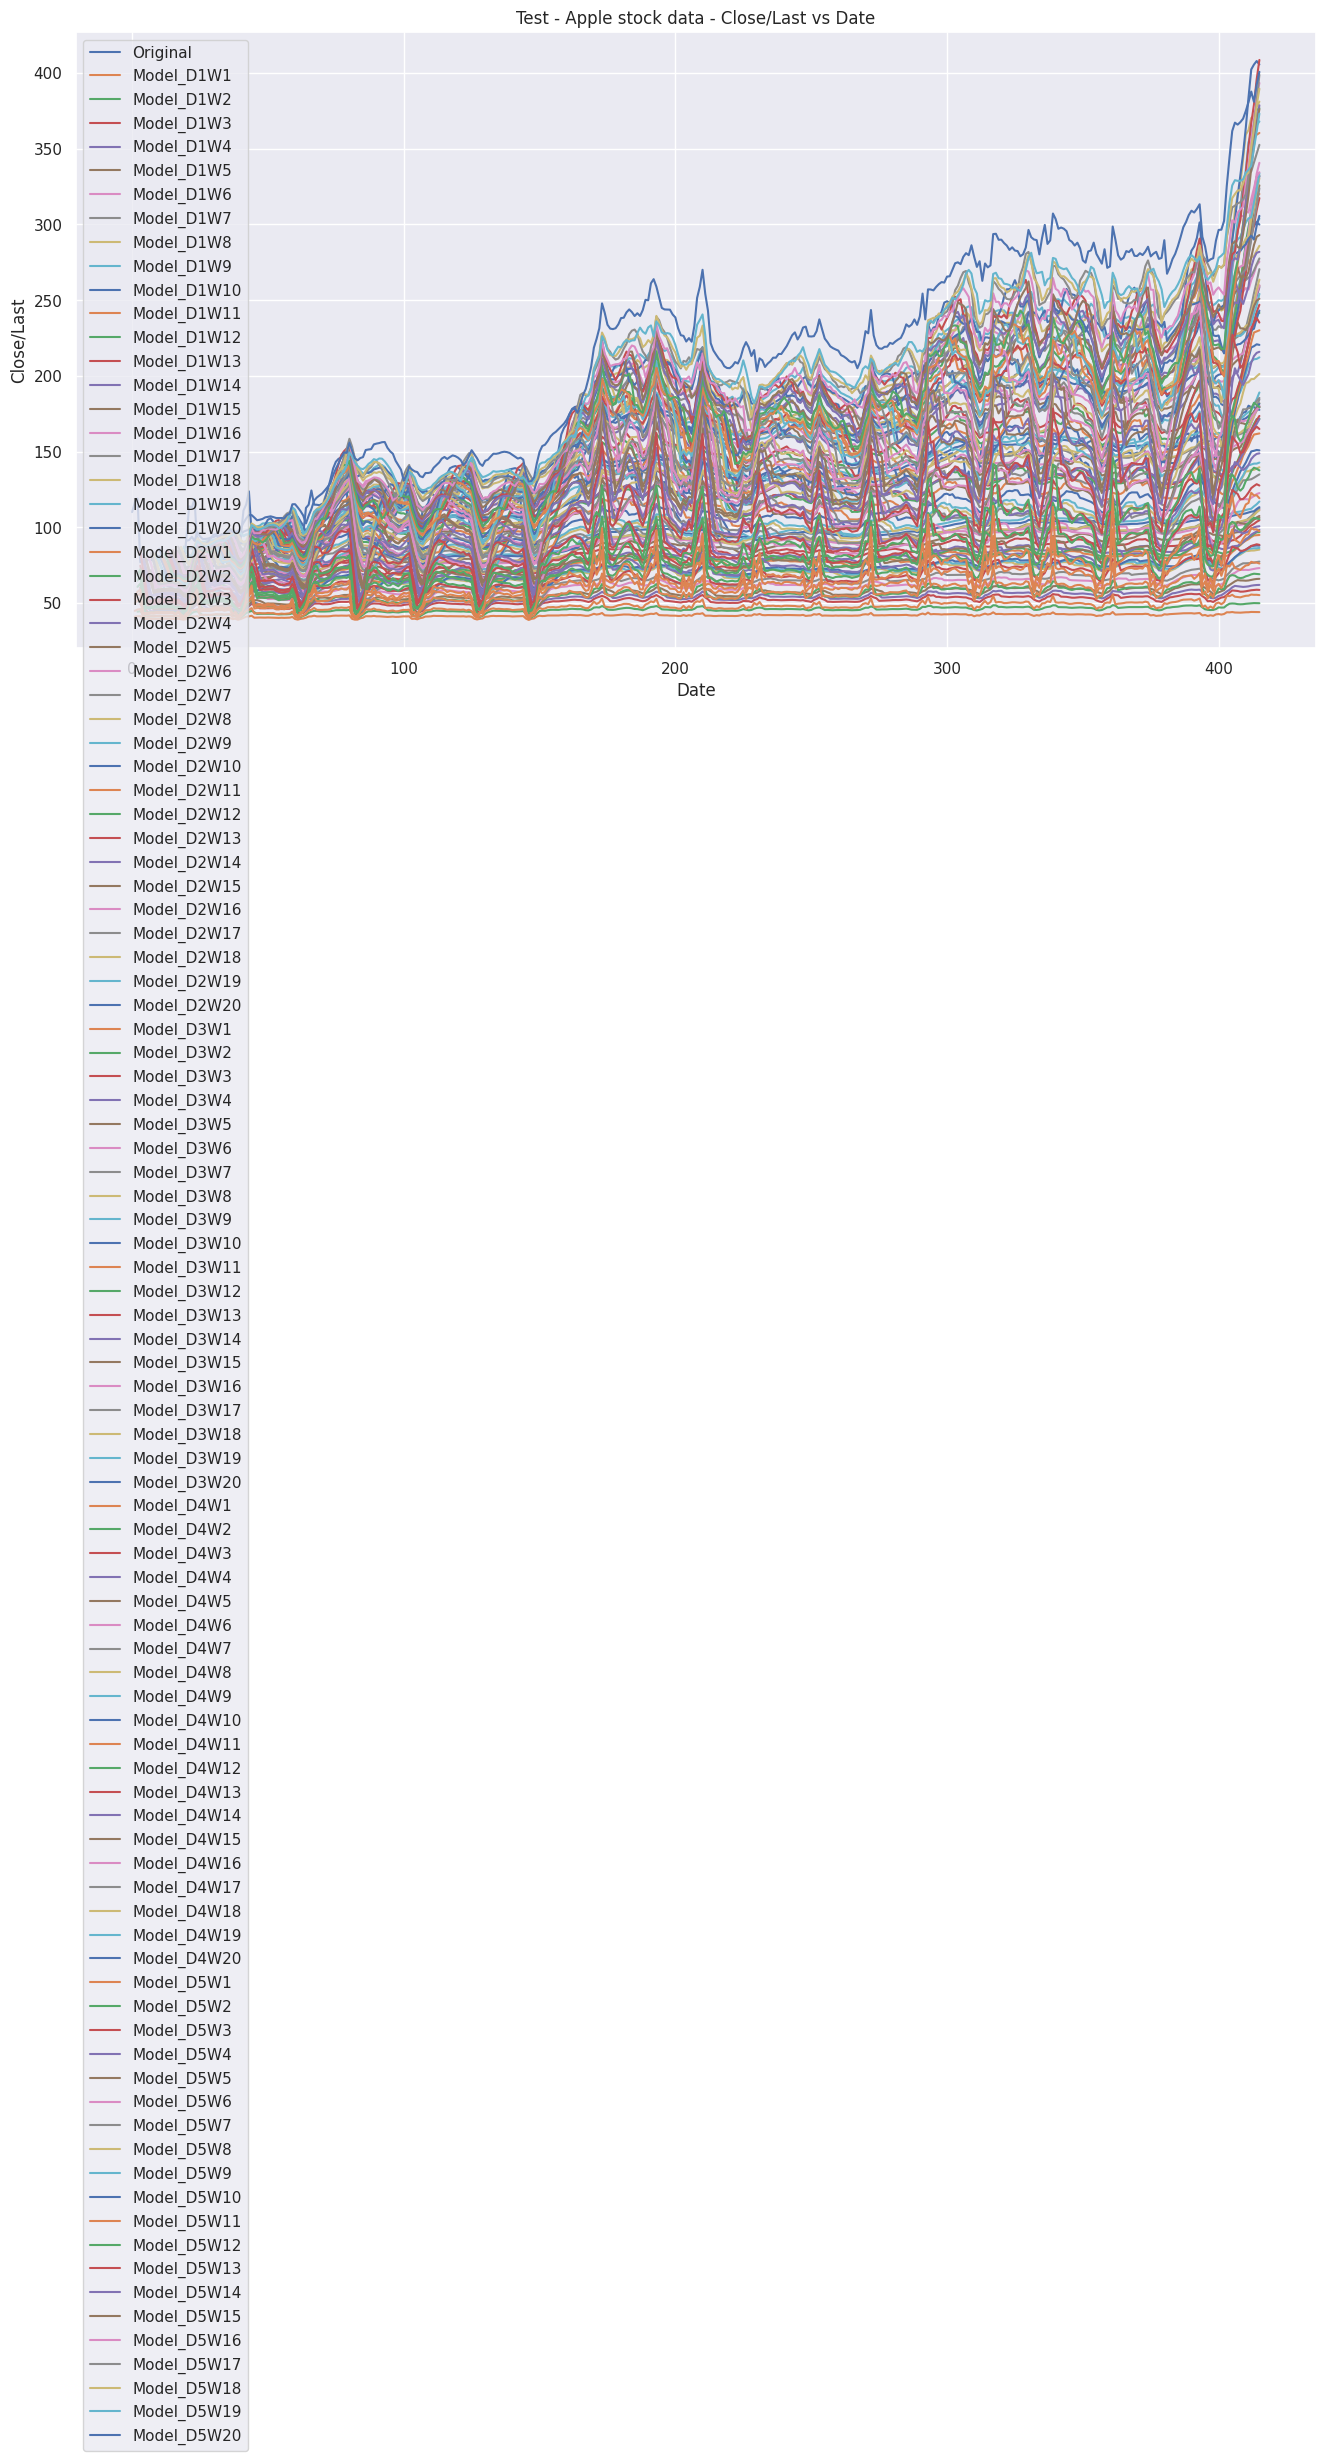

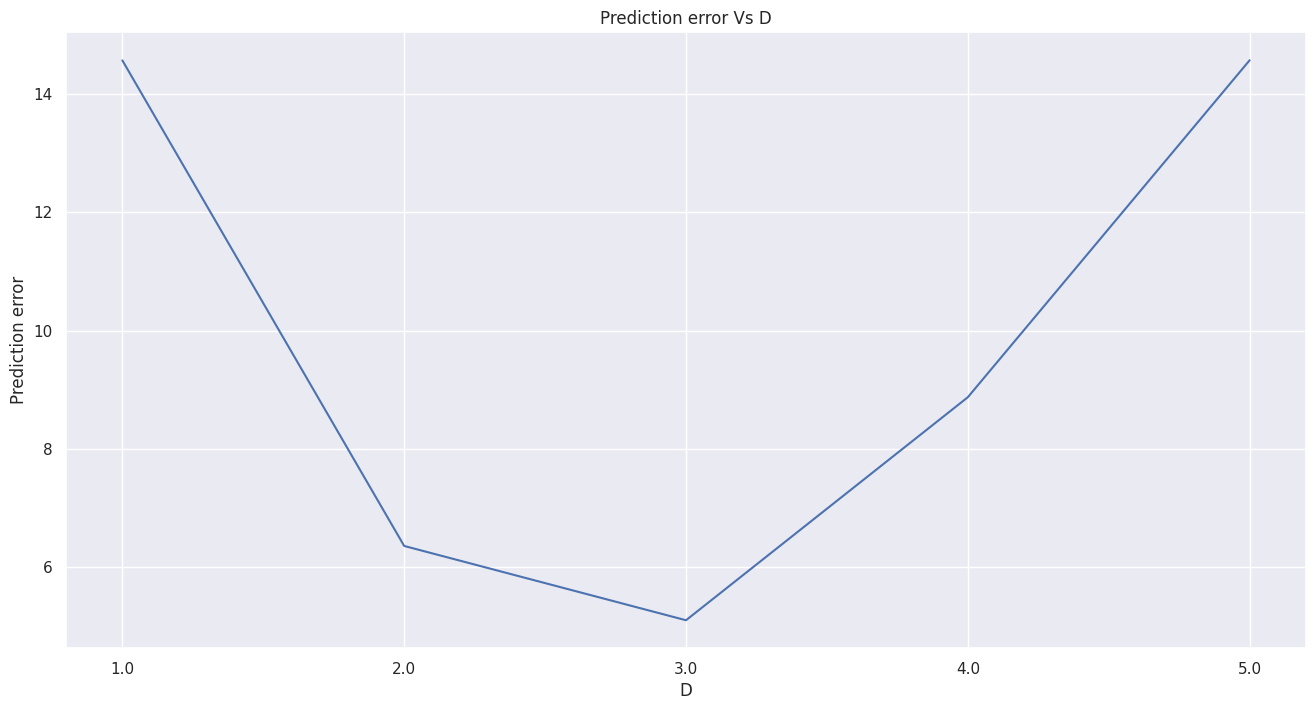

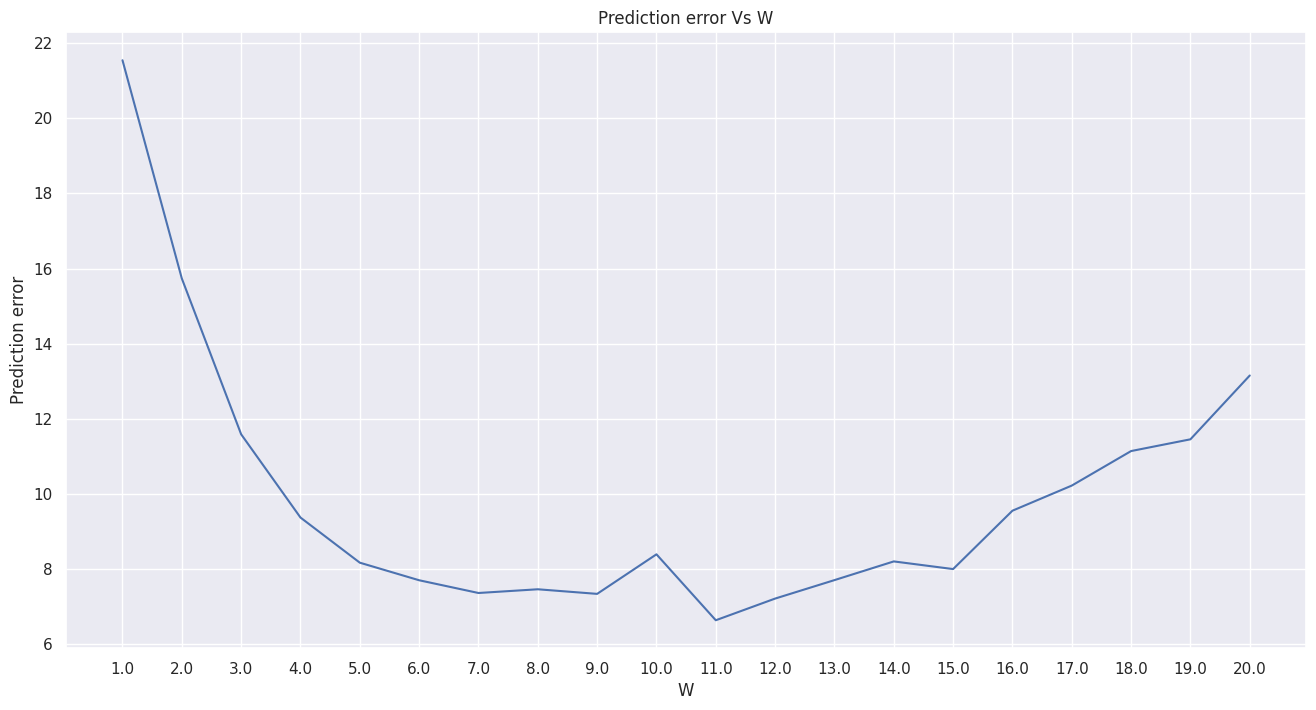

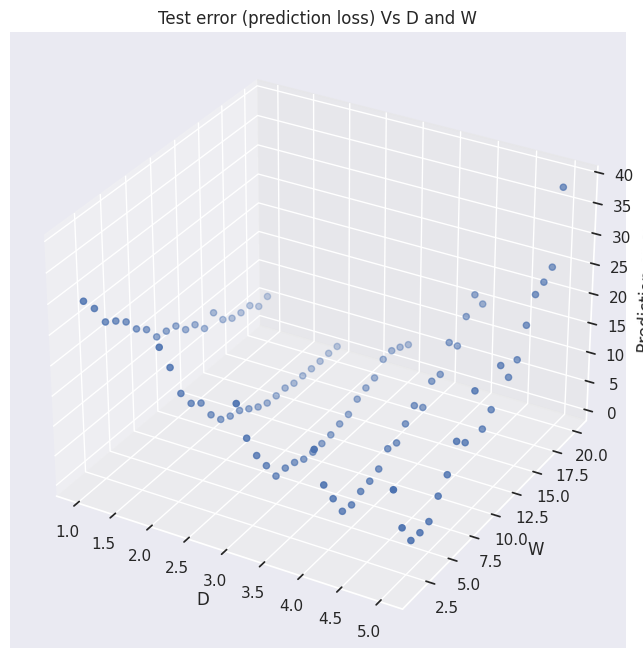

In [31]:
# i) Plot the prediction error Vs D (order of the polynomial fit - model complexity)
# ii) Plot the prediction error Vs W
# iii) 3-D plot Test error (prediction loss) Vs D and W.
# iv) Plot predictions vs original on same graph

# i
dataD = []
# ii
dataW = []
# iii
data3d = []
# iv
plt.figure(figsize=(16, 8))
sns.set_style("darkgrid")
sns.lineplot(Yte.flatten(), label="Original")

for model in models:
    print(f"Model d = {model.degree} and w = {model.window_size}")
    # Generate test data
    Xte_tprd, Yte_tprd = model.gen_tpr_data(Xte, Yte)
    # Predict
    Yte_pred, loss = model.predict(Xte_tprd, Yte_tprd)
    # pad Yte
    Yte_pred = np.pad(
        Yte_pred, (model.window_size, 0), mode="constant", constant_values=np.nan
    )
    print(f"Test Loss: {loss:.6f}")

    # iv
    sns.lineplot(Yte_pred, label=model.name)
    # iii
    data3d.append([model.degree, model.window_size, loss])
    # ii
    dataW.append([model.window_size, loss])
    # i
    dataD.append([model.degree, loss])

plt.title("Test - Apple stock data - Close/Last vs Date")
plt.xlabel("Date")
plt.ylabel("Close/Last")
plt.legend()
plt.show()

# (i)
dataD = np.array(dataD)
# Mean by degree
dataD = np.array(
    [
        [degree, np.mean(dataD[dataD[:, 0] == degree, 1])]
        for degree in np.unique(dataD[:, 0])
    ]
)
plt.figure(figsize=(16, 8))
sns.set_style("darkgrid")
sns.lineplot(dataD[:, 1])
# change ticks with dataD[:, 0]
plt.xticks(np.arange(0, dataD.shape[0]), dataD[:, 0])
plt.title("Prediction error Vs D")
plt.xlabel("D")
plt.ylabel("Prediction error")
plt.show()

# (ii)
dataW = np.array(dataW)
# Mean by window size
dataW = np.array(
    [
        [window_size, np.mean(dataW[dataW[:, 0] == window_size, 1])]
        for window_size in np.unique(dataW[:, 0])
    ]
)
plt.figure(figsize=(16, 8))
sns.set_style("darkgrid")
sns.lineplot(dataW[:, 1])
plt.xticks(np.arange(0, dataW.shape[0]), dataW[:, 0])
plt.title("Prediction error Vs W")
plt.xlabel("W")
plt.ylabel("Prediction error")
plt.show()

# (iii)
data3d = np.array(data3d)
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data3d[:, 0], data3d[:, 1], data3d[:, 2])
ax.set_xlabel("D")
ax.set_ylabel("W")
ax.set_zlabel("Prediction error")
plt.title("Test error (prediction loss) Vs D and W")
plt.show()


*   As the value of p increases above the bias decreases(for training data) and variance of model increases increases.
*   As the value of k increases the bias decreases(for testing data) and model variance decreases.

